In [19]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

In [20]:
df = pd.read_csv('df_preprocessed.csv',)
df = df[['FATALITIES', 'YEAR', 'EVENT_TYPE']]
row_count = df.shape[0]
column_count = df.shape[1]
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df

The DataFrame has 96082 rows.
The DataFrame has 3 columns.


,FATALITIES,YEAR,EVENT_TYPE
0,0.0,-1.771717,0
1,0.0,-1.771717,0
2,0.0,-1.771717,0
3,0.0,-1.771717,0
4,0.0,-1.771717,0
...,...,...,...
96077,0.0,1.181145,2
96078,0.0,0.590572,2
96079,0.0,0.590572,2
96080,0.0,0.590572,0


In [21]:
x = df.drop('EVENT_TYPE', axis=1)
y = df['EVENT_TYPE']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [22]:
knn = GridSearchCV(estimator= KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 10], 'algorithm': ['kd_tree']}, n_jobs=-1)

knn.fit(x_train, y_train)
knn.best_params_

KeyboardInterrupt: 

In [ ]:
dump(knn, "knn_model_another.joblib") 

['knn_model_another.joblib']

In [ ]:
param_grid = {
    'C': [10],
    'kernel': ['rbf'],
    'gamma': [10],
}
svm = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=3)
svm.fit(x_train, y_train)
svm.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END ........C=10, gamma=10, kernel=rbf;, score=0.640 total time= 3.6min
[CV 1/5] END ........C=10, gamma=10, kernel=rbf;, score=0.641 total time= 3.6min
[CV 3/5] END ........C=10, gamma=10, kernel=rbf;, score=0.645 total time= 3.7min
[CV 5/5] END ........C=10, gamma=10, kernel=rbf;, score=0.640 total time= 4.0min
[CV 4/5] END ........C=10, gamma=10, kernel=rbf;, score=0.639 total time= 4.0min


{'C': 10, 'gamma': 10, 'kernel': 'rbf'}

In [ ]:
dump(svm, "svm_model_another.joblib")

['svm_model_another.joblib']

In [ ]:
param_grid = {
    'n_estimators' : [10, 50, 100],
    'criterion': ['gini'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
}
random_forest = GridSearchCV(estimator=RandomForestClassifier(),  param_grid=param_grid,
                     n_jobs=-1, verbose=3, cv=5)
random_forest.fit(x_train, y_train)
random_forest.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.641 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.640 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.640 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.646 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.641 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.641 total time=   2.6s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.640 total time= 

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
random_forest = random_forest.best_estimator_
dump(random_forest, "random_forest_model_another.joblib") 

['random_forest_model_another.joblib']

/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

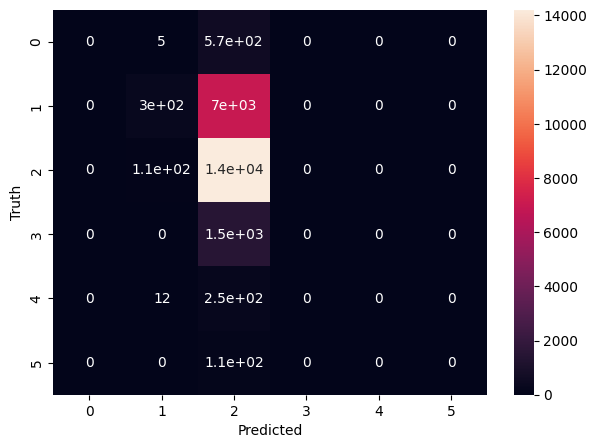

In [ ]:
y_pred = knn.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       576
           1       0.70      0.04      0.08      7271
           2       0.60      0.99      0.75     14323
           3       0.00      0.00      0.00      1479
           4       0.00      0.00      0.00       259
           5       0.00      0.00      0.00       113

    accuracy                           0.60     24021
   macro avg       0.22      0.17      0.14     24021
weighted avg       0.57      0.60      0.47     24021



/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

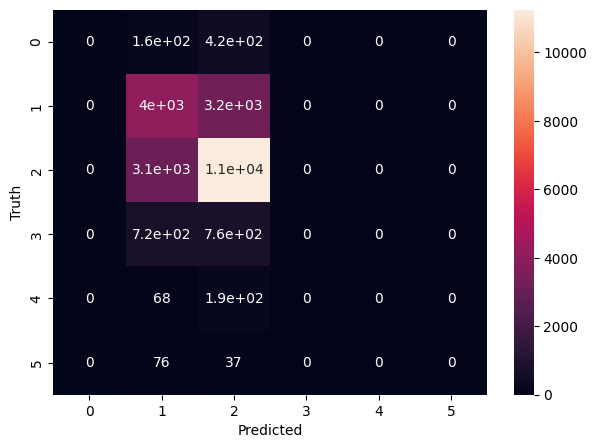

In [ ]:
y_pred = svm.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       576
           1       0.50      0.56      0.53      7271
           2       0.71      0.78      0.74     14323
           3       0.00      0.00      0.00      1479
           4       0.00      0.00      0.00       259
           5       0.00      0.00      0.00       113

    accuracy                           0.64     24021
   macro avg       0.20      0.22      0.21     24021
weighted avg       0.57      0.64      0.60     24021



/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

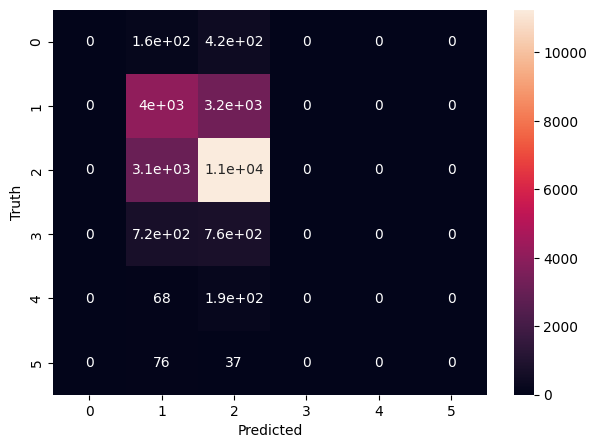

In [ ]:
y_pred = random_forest.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       576
           1       0.50      0.56      0.52      7271
           2       0.71      0.79      0.74     14323
           3       0.00      0.00      0.00      1479
           4       0.00      0.00      0.00       259
           5       0.00      0.00      0.00       113

    accuracy                           0.64     24021
   macro avg       0.20      0.22      0.21     24021
weighted avg       0.57      0.64      0.60     24021



/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Variable: YEAR                 Importance: 0.92
Variable: FATALITIES           Importance: 0.08


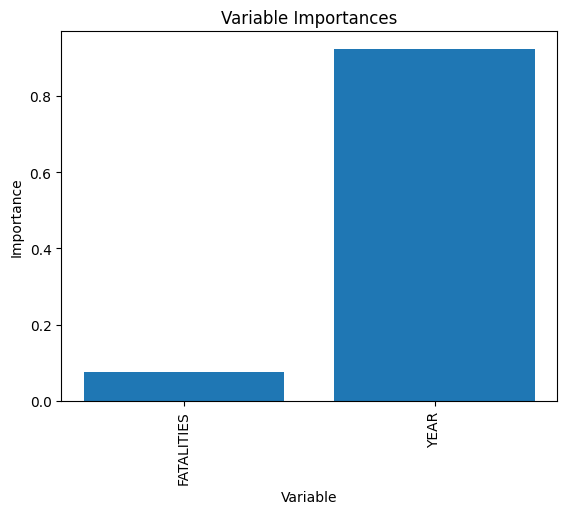

In [ ]:
importances = random_forest.feature_importances_

# Get the name of the features
feature_list = list(x.columns)

# List of tuples with variable and importance
feature_importance= [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()